# Spatio-temporal analysis

In [1]:
import pylandstats as pls

We are often interested in the analysis of the temporal evolution of the configuration and composition of a particular landscape. To this end, we can use the class `SpatioTemporalAnalysis`, which we can instantiate with a temporally-ordered sequence of landscape snapshots.

In this case, we will use the three extracts of the Canton of Vaud from the [CORINE Land Cover datasets](https://land.copernicus.eu/pan-european/corine-land-cover) for the years 2000, 2006 and 2012.

In [2]:
input_filepaths = [
    '../data/clc/vaud_g100_clc00_V18_5.tif',
    '../data/clc/vaud_g100_clc06_V18_5a.tif',
    '../data/clc/vaud_g100_clc12_V18_5a.tif'
]

sta = pls.SpatioTemporalAnalysis(input_filepaths, dates=[2000, 2006, 2012])

## Spatio-temporal data frames

By now, `SpatioTemporalAnalysis` only supports class and landscape-level metrics, which are available as [properties](https://docs.python.org/3/howto/descriptor.html#properties) of our `SpatioTemporalAnalysis` instance. For instance, a data frame of the class-level metrics can be obtained as follows:

In [3]:
sta.class_metrics_df

metric          total_area proportion_of_landscape number_of_patches  \
class_val dates                                                        
1         2000       24729                 7.70194               193   
          2006       24599                 7.66145               200   
          2012       24766                 7.71346               201   
2         2000      296346                 92.2981                13   
          2006      296476                 92.3386                 8   
          2012      296309                 92.2865                 8   

metric          patch_density largest_patch_index  total_edge edge_density  \
class_val dates                                                              
1         2000      0.0601106             2.06992  1.4316e+06      4.45877   
          2006      0.0622907             2.02227   1.436e+06      4.47248   
          2012      0.0626022             2.02227  1.4459e+06      4.50331   
2         2000      0.0040489             89.4514  1.4316e+06      4.45877   
          2006     0.00249163             89.1318   1.436e+06      4.47248   
          2012     0.00249163             89.0916  1.4459e+06      4.50331   

metric          landscape_shape_index  area_mn  area_am  ...  \
class_val dates                                          ...   
1         2000                22.9492   128.13  2201.71  ...   
          2006                23.0892  122.995  2031.22  ...   
          2012                 23.181  123.214  2019.46  ...   
2         2000                10.0533  22795.8   278596  ...   
          2006                10.0744  37059.5   276495  ...   
          2012                10.1175  37038.6   276399  ...   

metric          fractal_dimension_md fractal_dimension_ra  \
class_val dates                                             
1         2000               1.08167             0.200096   
          2006               1.08076             0.195545   
          2012               1.07917             0.195545   
2         2000               1.06999             0.206571   
          2006               1.08792             0.194132   
          2012               1.08792             0.194539   

metric          fractal_dimension_sd fractal_dimension_cv  \
class_val dates                                             
1         2000             0.0357722              3.29813   
          2006               0.03525              3.25178   
          2012             0.0347995              3.20964   
2         2000             0.0568234              5.32212   
          2006             0.0548953              5.01883   
          2012             0.0550874              5.03546   

metric          euclidean_nearest_neighbor_mn euclidean_nearest_neighbor_am  \
class_val dates                                                               
1         2000                        1023.35                       707.998   
          2006                        1003.28                        703.96   
          2012                        1005.07                       703.368   
2         2000                        246.646                       202.443   
          2006                        239.112                       202.436   
          2012                        239.112                       202.426   

metric          euclidean_nearest_neighbor_md euclidean_nearest_neighbor_ra  \
class_val dates                                                               
1         2000                        781.025                       6772.09   
          2006                         721.11                       6772.09   
          2012                        728.011                       6772.09   
2         2000                        223.607                       116.228   
          2006                        223.607                           100   
          2012                        223.607                           100   

metric          euclidean_nearest_neighbo

Again, we can use the operations of any pandas data frame. For instance, we can get all the metrics for the *urban* class (`class_val` of 1) in 2000

In [4]:
sta.class_metrics_df.loc[(1, 2000)]

metric
total_area                            24729
proportion_of_landscape             7.70194
number_of_patches                       193
patch_density                     0.0601106
largest_patch_index                 2.06992
total_edge                       1.4316e+06
edge_density                        4.45877
landscape_shape_index               22.9492
area_mn                              128.13
area_am                             2201.71
area_md                                  43
area_ra                                6645
area_sd                             515.449
area_cv                             402.287
perimeter_area_ratio_mn             107.149
perimeter_area_ratio_am             58.4658
perimeter_area_ratio_md             102.222
perimeter_area_ratio_ra             377.761
perimeter_area_ratio_sd             50.9116
perimeter_area_ratio_cv             47.5146
shape_index_mn                      1.77764
shape_index_am                      3.07474
shape_index_md           

Similarly, the data frame of landscape metrics can be obtained as follows:

In [5]:
sta.landscape_metrics_df

metric,total_area,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,landscape_shape_index,area_mn,area_am,area_md,...,fractal_dimension_sd,fractal_dimension_cv,euclidean_nearest_neighbor_mn,euclidean_nearest_neighbor_am,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv,contagion,shannon_diversity_index
dates,,,,,,,,,,,,,,,,,,,,,
2000,321075,206,0.0641595,89.4514,1.4316e+06,4.45877,9.71693,1558.62,257309,43,...,0.0376779,3.47726,974.339,241.38,700,6772.09,872.438,89.5415,73.4018,0.271429
2006,321075,208,0.0647824,89.1318,1.436e+06,4.47248,9.73633,1543.63,255467,45,...,0.0362519,3.34304,973.887,240.86,714.109,6772.09,878.977,90.2545,73.4629,0.270422
2012,321075,209,0.0650938,89.0916,1.4459e+06,4.50331,9.77998,1536.24,255235,45,...,0.0358375,3.30423,975.747,241.066,721.11,6772.09,872.972,89.4671,73.3309,0.271715


### Customizing your spatio-temporal analysis

As within the `Landscape` analysis, we can also choose to compute a subset of metrics only with the `metrics` argument, however, for `SpatioTemporalAnalysis` instances, we must pass it to the initialization method as in:

In [6]:
sta = pls.SpatioTemporalAnalysis(
    input_filepaths, 
    metrics=[
        'proportion_of_landscape', 'edge_density', 'fractal_dimension_am'], 
    dates=[2000, 2006, 2012])
sta.class_metrics_df

metric          edge_density fractal_dimension_am proportion_of_landscape
class_val dates                                                          
1         2000       4.45877              1.12956                 7.70194
          2006       4.47248              1.12336                 7.66145
          2012       4.50331              1.12347                 7.71346
2         2000       4.45877                1.204                 92.2981
          2006       4.47248                1.203                 92.3386
          2012       4.50331              1.20344                 92.2865

Similarly, we can choose to compute them only for a subset of classes through the `classes` argument. We can simoultaneously choose a subset of metrics as well as a subset of classes by specifying both the `metrics` and `classes` arguments. For instance, we can choose to only compute the above metrics and only for the *urban* class (value of 1):

In [7]:
sta = pls.SpatioTemporalAnalysis(
    input_filepaths, metrics=[
        'proportion_of_landscape',
        'edge_density',
        'fractal_dimension_am',
        'landscape_shape_index',
        'shannon_diversity_index'
    ], classes=[1], dates=[2000, 2006, 2012])
sta.class_metrics_df

metric          edge_density fractal_dimension_am landscape_shape_index  \
class_val dates                                                           
1         2000       4.45877              1.12956               22.9492   
          2006       4.47248              1.12336               23.0892   
          2012       4.50331              1.12347                23.181   

metric          proportion_of_landscape  
class_val dates                          
1         2000                  7.70194  
          2006                  7.66145  
          2012                  7.71346

Finally, we can also customize how some metrics are computed through the `metrics_kws` argument. Again, for `SpatioTemporalAnalysis`, we must pass it to the initialization method.

In [8]:
sta = pls.SpatioTemporalAnalysis(
    input_filepaths, metrics=[
        'proportion_of_landscape',
        'edge_density',
        'fractal_dimension_am',
        'landscape_shape_index',
        'shannon_diversity_index'
    ], classes=[1], dates=[2000, 2006, 2012], 
    metrics_kws={
        'proportion_of_landscape': {'percent': False},
        'edge_density': {'count_boundary': True}
    })
sta.class_metrics_df

metric          edge_density fractal_dimension_am landscape_shape_index  \
class_val dates                                                           
1         2000         4.503              1.12956               22.9492   
          2006       4.51608              1.12336               23.0892   
          2012       4.54847              1.12347                23.181   

metric          proportion_of_landscape  
class_val dates                          
1         2000                0.0770194  
          2006                0.0766145  
          2012                0.0771346

The fact that all the above arguments are passed to `SpatioTemporalAnalysis` initialization method means that once we have chosen a subset of metrics, classes or customized some metrics, we will not be able to modify such choices without having to re-initialize a `SpatioTemporalAnalysis` instance. Therefore, if you do not know which metrics or classes you will need, just compute them all and filter the data frame later if needed.

## Plots

One of the most important features of `SpatioTemporalAnalysis` is to plot the evolution of the metrics. We can plot the proportion o landscape occupied by the *urban* class (`class_val` of 1) as in:

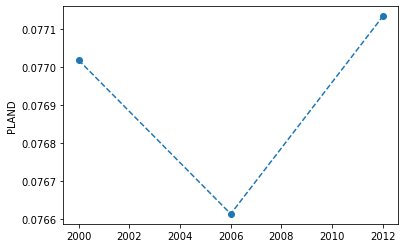

In [9]:
sta.plot_metric('proportion_of_landscape', class_val=1)

If we want to plot the evolution of a metric at the landscape level, we can do so by using the same `plot_metric` method, but without setting the `class_val` argument. Note however that we cannot compute the `proportion_of_landscape` at the landscape level (we could but it makes no sense, the landscape always occupies 100% of the landscape). Similarly, some metrics such as `shannon_diversity_index` cannot be computed at the class level but only at the landscape level. See the documentation of each metric for more details, or [see above](available-metrics) the metrics that can be at each level.

Let's then plot the area-weighted fractal dimension, that is `fractal_dimension_am`, at both the class and landscape level:

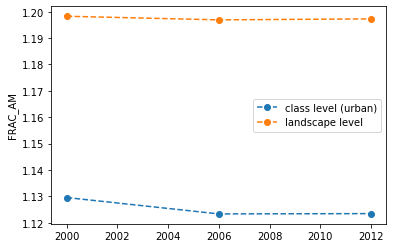

In [10]:
ax = sta.plot_metric('fractal_dimension_am', class_val=1, 
                     plot_kws={'label': 'class level (urban)'})
sta.plot_metric(
    'fractal_dimension_am', ax=ax, plot_kws={'label': 'landscape level'})
ax.legend()

Note that we can pass keyword arguments to matplotlib's `plot` method through the `plt_kws` argument of `plot_metric`. See the documentation of  [SpatioTemporalAnalysis.plot_metric](https://pylandstats.readthedocs.io/en/latest/spatiotemporal.html#pylandstats.SpatioTemporalAnalysis.plot_metric) for more details.

## See also

* [SpatioTemporalBufferAnalysis](https://github.com/martibosch/pylandstats-notebooks/blob/master/notebooks/04-spatiotemporal-buffer-analysis.ipynb)